# Validity of using prescription records to identify patient comorbidities
## Analysis of any diabetes

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|OpenCodelist (Snomed) and HDRUK (read)|
|drug codes|bnf 06.01|
|sql date|13.03.2025|
|sql code|T2dibetesselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [diabetes_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab


replace bnf_code = "Insulins" if bnf_code== "060101"
replace bnf_code = "Insulin syringes" if bnf_code== "210109"
replace bnf_code = "Antidiabetec drugs" if bnf_code== "060102"
replace bnf_code = "Hypoglycaemia" if bnf_code== "060104"
replace bnf_code = "Diagnostic and monitoring devices" if bnf_code== "060106"
replace bnf_code = "Other/unknown" if (missing(bnf_code) & ! missing(drug_dt))



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(28,711 missing values generated)
(28,711 real changes made)
(38,152 missing values generated)
(38,152 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str8
(2,851 real changes made)
variable bnf_code was str8 now str16
(1,223 real changes made)
variable bnf_code was str16 now str18
(20,118 real changes made)
(115 real changes made)
variable bnf_code was str18 now str33
(3,907 real changes made)
(497 real changes made)
variable ethnicity was str2 now str6
(257,985 real changes made)
(3,762 real changes made)
(23,917 real changes made)
(7,430 real changes made)
(8,765 real changes made)
variable ethnicity was str6 now str7
(123,155 real changes made)


(bin=19, start=16, width=5)


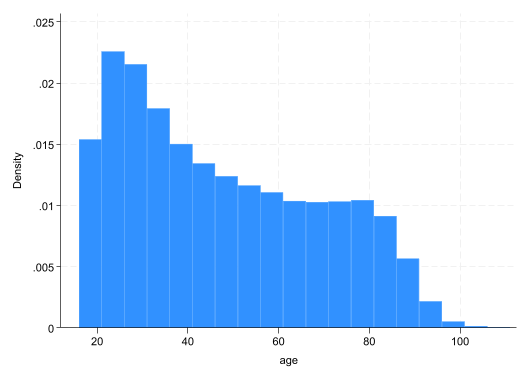

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------------------------------------------------
> -----------------------+
  |                                                                                                                  description   F
> req.   Percent     %<= |
  |---------------------------------------------------------------------------------------------------------------------------------
> -----------------------|
  |                                                                                          Diabetes mellitus type 2 (disorder)    
> 4467     11.71   11.71 |
  |                                                                                                    Type II diabetes mellitus    
> 3100      8.13   19.84 |
  |                                                                                   Diabetic retinopathy screening (procedure)    
> 1620      4.25   24.09 |
  |                                    

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +--------------------------------------------------------------+
  |                          bnf_code   Freq.   Percent      %<= |
  |--------------------------------------------------------------|
  |                Antidiabetec drugs   20118     70.07    70.07 |
  | Diagnostic and monitoring devices    3907     13.61    83.68 |
  |                          Insulins    2851      9.93    93.61 |
  |                  Insulin syringes    1223      4.26    97.87 |
  |                     Other/unknown     497      1.73    99.60 |
  |--------------------------------------------------------------|
  |                     Hypoglycaemia     115      0.40   100.00 |
  +--------------------------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    27,106     11,046 |    38,152 
    Normal |     1,605    385,257 |   386,862 
-----------+----------------------+----------
     Total |    28,711    396,303 |   425,014 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.0%      8.9%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.0%     70.6%     71.5%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    171.25    163.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    14,900      5,450 |    20,350 
    Normal |       394    187,549 |   187,943 
-----------+----------------------+----------
     Total |    15,294    192,999 |   208,293 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.6%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     73.2%     72.6%     73.8%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    349.26    316.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    12,205      5,596 |    17,801 
    Normal |     1,211    197,700 |   198,911 
-----------+----------------------+----------
     Total |    13,416    203,296 |   216,712 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.2%      8.1%       8.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.6%     67.9%     69.2%
Specificity                      Pr(-|N)     99.4%     99.4%     99.4%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    112.62    106.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,031        376 |     1,407 
    Normal |       516    115,751 |   116,267 
-----------+----------------------+----------
     Total |     1,547    116,127 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.1%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     73.3%     70.9%     75.6%
Specificity                      Pr(-|N)     99.6%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.86      0.85      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    165.11    150.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    14,128      4,828 |    18,956 
    Normal |       774    201,678 |   202,452 
-----------+----------------------+----------
     Total |    14,902    206,506 |   221,408 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.6%      8.4%       8.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     74.5%     73.9%     75.1%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.87      0.87      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    194.95    181.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,947      5,842 |    17,789 
    Normal |       315     67,828 |    68,143 
-----------+----------------------+----------
     Total |    12,262     73,670 |    85,932 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     20.7%     20.4%      21.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     67.2%     66.5%     67.8%
Specificity                      Pr(-|N)     99.5%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.83      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    145.28    130.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,505      2,817 |    12,322 
    Normal |       494    137,189 |   137,683 
-----------+----------------------+----------
     Total |     9,999    140,006 |   150,005 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.2%      8.1%       8.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     77.1%     76.4%     77.9%
Specificity                      Pr(-|N)     99.6%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.88      0.88      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    214.99    196.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,349      3,682 |    13,031 
    Normal |       516    136,459 |   136,975 
-----------+----------------------+----------
     Total |     9,865    140,141 |   150,006 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.7%      8.5%       8.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.7%     71.0%     72.5%
Specificity                      Pr(-|N)     99.6%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.86      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    190.45    174.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,252      4,547 |    12,799 
    Normal |       595    111,609 |   112,204 
-----------+----------------------+----------
     Total |     8,847    116,156 |   125,003 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.2%     10.1%      10.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     64.5%     63.6%     65.3%
Specificity                      Pr(-|N)     99.5%     99.4%     99.5%
ROC area               (Sens. + Spec.)/2      0.82      0.82      0.82 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    121.58    112.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,020      4,110 |    15,130 
    Normal |       601    138,827 |   139,428 
-----------+----------------------+----------
     Total |    11,621    142,937 |   154,558 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.6%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.8%     72.1%     73.5%
Specificity                      Pr(-|N)     99.6%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.86      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    168.97    155.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,200      3,709 |    12,909 
    Normal |       529    129,612 |   130,141 
-----------+----------------------+----------
     Total |     9,729    133,321 |   143,050 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.0%      8.9%       9.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.3%     70.5%     72.0%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    175.33    160.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,850      3,188 |    10,038 
    Normal |       472    114,307 |   114,779 
-----------+----------------------+----------
     Total |     7,322    117,495 |   124,817 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.0%      7.9%       8.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.2%     67.3%     69.2%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    165.94    151.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,307      2,477 |     8,784 
    Normal |       449     80,410 |    80,859 
-----------+----------------------+----------
     Total |     6,756     82,887 |    89,643 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.6%      10.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.8%     70.8%     72.7%
Specificity                      Pr(-|N)     99.4%     99.4%     99.5%
ROC area               (Sens. + Spec.)/2      0.86      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    129.30    117.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       653        345 |       998 
    Normal |        67     15,660 |    15,727 
-----------+----------------------+----------
     Total |       720     16,005 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.0%      5.6%       6.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     65.4%     62.4%     68.4%
Specificity                      Pr(-|N)     99.6%     99.5%     99.7%
ROC area               (Sens. + Spec.)/2      0.83      0.81      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    153.59    120.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,603      1,102 |     4,705 
    Normal |       199     41,642 |    41,841 
-----------+----------------------+----------
     Total |     3,802     42,744 |    46,546 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.1%      9.8%      10.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     76.6%     75.3%     77.8%
Specificity                      Pr(-|N)     99.5%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    161.01    140.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,126      2,533 |     8,659 
    Normal |       233     77,221 |    77,454 
-----------+----------------------+----------
     Total |     6,359     79,754 |    86,113 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.1%      9.9%      10.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     70.7%     69.8%     71.7%
Specificity                      Pr(-|N)     99.7%     99.7%     99.7%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    235.18    206.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,565      1,209 |     3,774 
    Normal |       168     43,651 |    43,819 
-----------+----------------------+----------
     Total |     2,733     44,860 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.9%      7.7%       8.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.0%     66.4%     69.5%
Specificity                      Pr(-|N)     99.6%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    177.27    152.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,766      2,078 |     6,844 
    Normal |       334     83,308 |    83,642 
-----------+----------------------+----------
     Total |     5,100     85,386 |    90,486 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.6%      7.4%       7.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     69.6%     68.5%     70.7%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    174.39    156.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,467      1,046 |     3,513 
    Normal |       123     32,540 |    32,663 
-----------+----------------------+----------
     Total |     2,590     33,586 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.7%      9.4%      10.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     70.2%     68.7%     71.7%
Specificity                      Pr(-|N)     99.6%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    186.48    156.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    16,342      6,117 |    22,459 
    Normal |       890    205,416 |   206,306 
-----------+----------------------+----------
     Total |    17,232    211,533 |   228,765 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.8%      9.7%       9.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.8%     72.2%     73.3%
Specificity                      Pr(-|N)     99.6%     99.5%     99.6%
ROC area               (Sens. + Spec.)/2      0.86      0.86      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    168.67    157.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       768        300 |     1,068 
    Normal |        43     12,635 |    12,678 
-----------+----------------------+----------
     Total |       811     12,935 |    13,746 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      7.8%      7.3%       8.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.9%     69.1%     74.6%
Specificity                      Pr(-|N)     99.7%     99.5%     99.8%
ROC area               (Sens. + Spec.)/2      0.86      0.84      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    212.02    156.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     9,982      4,629 |    14,611 
    Normal |       672    167,084 |   167,756 
-----------+----------------------+----------
     Total |    10,654    171,713 |   182,367 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.0%      7.9%       8.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.3%     67.6%     69.1%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    170.55    158.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    20,285      8,776 |    29,061 
    Normal |     1,135    291,508 |   292,643 
-----------+----------------------+----------
     Total |    21,420    300,284 |   321,704 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      9.0%      8.9%       9.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     69.8%     69.3%     70.3%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    179.97    169.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,821      2,270 |     9,091 
    Normal |       470     93,749 |    94,219 
-----------+----------------------+----------
     Total |     7,291     96,019 |   103,310 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      8.8%      8.6%       9.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.0%     74.1%     75.9%
Specificity                      Pr(-|N)     99.5%     99.5%     99.5%
ROC area               (Sens. + Spec.)/2      0.87      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    150.41    137.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    18,351      7,772 |    26,123 
    Normal |       980    230,882 |   231,862 
-----------+----------------------+----------
     Total |    19,331    238,654 |   257,985 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.1%     10.0%      10.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     70.2%     69.7%     70.8%
Specificity                      Pr(-|N)     99.6%     99.6%     99.6%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    166.20    156.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,837      1,229 |     5,066 
    Normal |       242     38,566 |    38,808 
-----------+----------------------+----------
     Total |     4,079     39,795 |    43,874 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.5%     11.2%      11.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.7%     74.5%     76.9%
Specificity                      Pr(-|N)     99.4%     99.3%     99.5%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    121.46    107.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,918      2,045 |     6,963 
    Normal |       383    115,809 |   116,192 
-----------+----------------------+----------
     Total |     5,301    117,854 |   123,155 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.7%      5.5%       5.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     70.6%     69.5%     71.7%
Specificity                      Pr(-|N)     99.7%     99.6%     99.7%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    214.27    193.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 28,671
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -6177.5688                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |     16.897    .434474   109.95   0.000     16.06655    17.77038
------------------------------------------------------------------------------


In [37]:
logistic diag_pos i.bnf_code_values if test==1


Logistic regression                                     Number of obs = 28,671
                                                        LR chi2(5)    = 230.77
                                                        Prob > chi2   = 0.0000
Log likelihood = -6062.1838                             Pseudo R2     = 0.0187

----------------------------------------------------------------------------------------------------
                          diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-----------------------------------+----------------------------------------------------------------
                   bnf_code_values |
Diagnostic and monitoring devices  |   .6884242   .0476411    -5.39   0.000     .6011049    .7884279
                    Hypoglycaemia  |   .2935845   .0759248    -4.74   0.000     .1768484    .4873768
                 Insulin syringes  |   .3987759   .0372977    -9.83   0.000     .3319828    .4790075
                         Insulins  |   

In [38]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -6033.4381  
Iteration 1:  Log likelihood = -5211.3914  
Iteration 2:  Log likelihood = -5191.1014  
Iteration 3:  Log likelihood =  -5190.919  
Iteration 4:  Log likelihood = -5190.9189  

Refining starting values:

Grid node 0:  Log likelihood = -5196.8084

Fitting full model:

Iteration 0:  Log likelihood = -5196.8084  (not concave)
Iteration 1:  Log likelihood = -5170.1197  
Iteration 2:  Log likelihood = -5161.2196  
Iteration 3:  Log likelihood = -5160.6512  
Iteration 4:  Log likelihood = -5160.6502  
Iteration 5:  Log likelihood = -5160.6502  

Mixed-effects logistic regression               Number of obs     =     28,569
Group variable: practice_id                     Number of groups  =        325

                                                Obs per group:
                                                              min =          1
                                                              avg =       87.9

##### Likelihood ratio tests

In [39]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [40]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) = 377.56
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  10.63
Prob > chi2 = 0.0049

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 1127.43
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =  55.77
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   0.95
Prob > chi2 = 0.6218


#### NPV

In [41]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 393,745
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -50225.631                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   34.77224   .3361668   367.08   0.000     34.11956    35.43739
------------------------------------------------------------------------------


In [42]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,416 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -61570.319  
Iteration 1:  Log likelihood = -45137.881  
Iteration 2:  Log likelihood = -44288.831  
Iteration 3:  Log likelihood =  -44199.21  
Iteration 4:  Log likelihood = -44197.792  
Iteration 5:  Log likelihood =  -44197.79  

Refining starting values:

Grid node 0:  Log likelihood = -43254.436

Fitting full model:

Iteration 0:  Log likelihood = -43254.436  (not concave)
Iteration 1:  Log likelihood = -43192.665  
Iteration 2:  Log likelihood = -43179.396  
Iteration 3:  Log likelihood = -43174.386  
Iteration 4:  Log likelihood = -43173.708  
Iteration 5:  Log likelihood = -43173.707  

Mixed-effects logistic regression               Number of obs     =    392,877
Group variable: practice_id                     Number of groups  =        337

                                                Obs per group:
                                                              min =          1
      

##### Likelihood ratio tests

In [43]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [44]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) =  44.57
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) = 1029.80
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 9743.22
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) = 546.65
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   0.94
Prob > chi2 = 0.6244


In [45]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_dm, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
------------------------------------------------------------------
                                                    1        2    
------------------------------------------------------------------
sex_coded                                                         
  1                                              3.17 **   0.87 **
yearcat                                                           
  2010-2015                                      1.00      0.72 **
  2016-2020                                      0.82 **   0.43 **
agecat                                                            
  0Middle                                        7.10 **   0.13 **
  Elderly                                       16.73 **   0.03 **
region                                                            
  LONDON COMMISSIONING REGION                    0.66      1.02   
  MIDLANDS COMMISSIONING REGION                  1.16      1.06   
  NORTH EAST 

### Summary of validation parameters

In [46]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [47]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,9,71,99.6,94.4,97.2,.85,6.8
2,Male,9.8,73.2,99.8,97.4,97.2,.87,7.4
3,Female,8.2,68.6,99.4,91,97.2,.84,6.2
4,Age young,1.2,73.3,99.6,66.6,99.7,.86,1.3
5,Age middle,8.6,74.5,99.6,94.8,97.7,.87,6.8
6,Age elderly,20.7,67.2,99.5,97.4,92.1,.83,14.3
7,Year 2004-2009,8.2,77.1,99.6,95.1,98,.88,6.7
8,Year 2010-2015,8.7,71.7,99.6,94.8,97.4,.86,6.6
9,Year 2016-2020,10.2,64.5,99.5,93.3,96.1,.82,7.1
10,"IMD 1,3",9.8,72.8,99.6,94.8,97.1,.86,7.5


In [48]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_dm, replace)

file validity2.xlsx saved
